In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_percentage_error, mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")

In [218]:
df = pd.read_csv("heart_disease.csv")

In [219]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- There are total 12 features in the dataset.


1. Age: The person's age in years


2. Sex: The person's sex (M-> Male, F-> Female)


3. ChestPainType: The chest pain experienced. There are 4 types.
    - TA: Typical Angina
    - ATA: ATypical Angina
    - NAP: Non- Anginal Pain
    - ASY: Asymptomatic


4. RestingBP: The person's resting blood pressure (in mm Hg)


5. Cholesterol: The person's cholesterol measurement in mg/dl


6. FastingBS: The person's fasting blood sugar (> 120 mg/dl => 1 = true; 0 = false)


7. RestingECG: Resting electrocardiographic measurement (Normal, ST, LVH )


8. MaxHR: The person's maximum heart rate achieved


9. ExerciseAngina: Exercise induced angina (Y, N)


10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


11. ST_Slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


12. HeartDisease(target variable): Whether a person has a heart disease or not (0 = No heart disease, 1= has a heart disease)

In [220]:
df.shape

(918, 12)

   - We have considered 918 patients record in our dataset.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploratory Data Analysis (EDA)

Let's find how many people have heart disease and how many people doesn't have heart disease

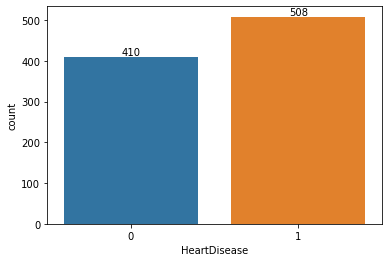

In [5]:
ax = sns.countplot(x='HeartDisease', data=df)
for i in ax.containers:
    ax.bar_label(i,)

- Under our analysis, we found that 508 people are suffering from heart disease, and 410 are healthy.

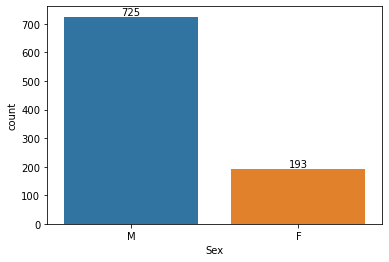

In [6]:
ax = sns.countplot(x='Sex', data=df)
for i in ax.containers:
    ax.bar_label(i,)

- There are 725 Males and 193 Females in the dataset considered. 

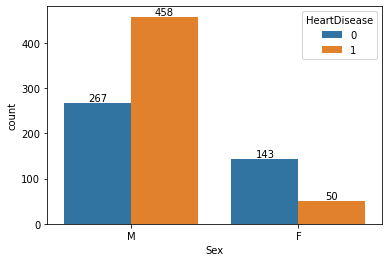

In [7]:
ax = sns.countplot(x='Sex', hue='HeartDisease' ,data=df)
for i in ax.containers:
    ax.bar_label(i,)

- The proportion of infected men is greater than that of females.

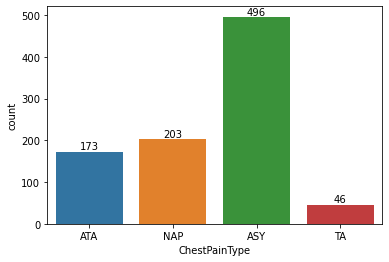

In [8]:
ax = sns.countplot(x='ChestPainType', data=df)
for i in ax.containers:
    ax.bar_label(i,)

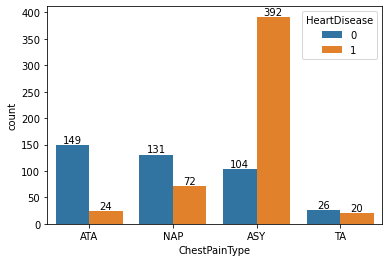

In [9]:
ax = sns.countplot(x='ChestPainType', hue='HeartDisease' ,data=df)
for i in ax.containers:
    ax.bar_label(i,)

- From this plot, we observe that those who have chest pain of type ASY is more likely to affected by heart disease.

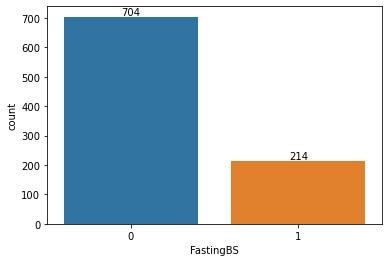

In [10]:
ax = sns.countplot(x='FastingBS', data=df)
for i in ax.containers:
    ax.bar_label(i,)

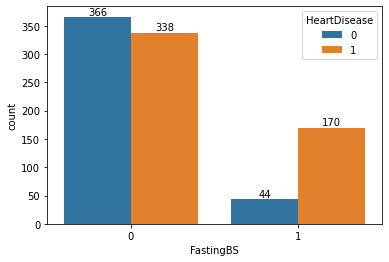

In [212]:
ax = sns.countplot(x='FastingBS', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- People having blood sugar are more likely to have heart disease.

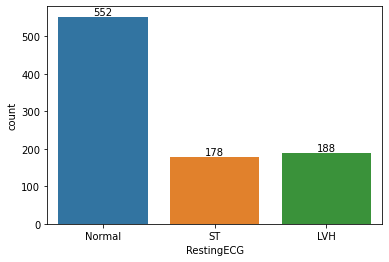

In [12]:
ax = sns.countplot(x='RestingECG', data=df)
for i in ax.containers:
    ax.bar_label(i,)

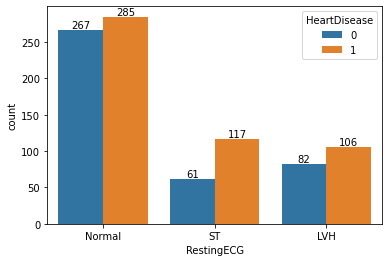

In [13]:
ax = sns.countplot(x='RestingECG', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

### write here

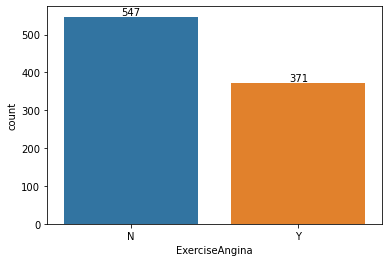

In [14]:
ax = sns.countplot(x='ExerciseAngina',data=df)
for i in ax.containers:
    ax.bar_label(i,)

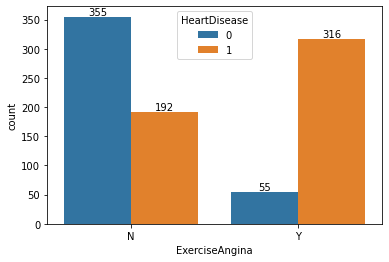

In [15]:
ax = sns.countplot(x='ExerciseAngina', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- write here

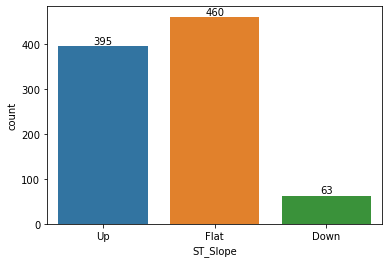

In [16]:
ax = sns.countplot(x='ST_Slope',data=df)
for i in ax.containers:
    ax.bar_label(i,)

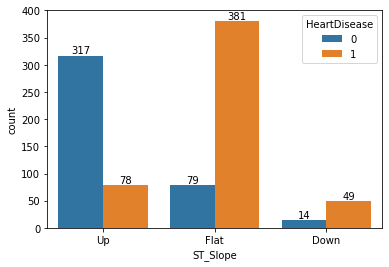

In [17]:
ax = sns.countplot(x='ST_Slope', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- write here

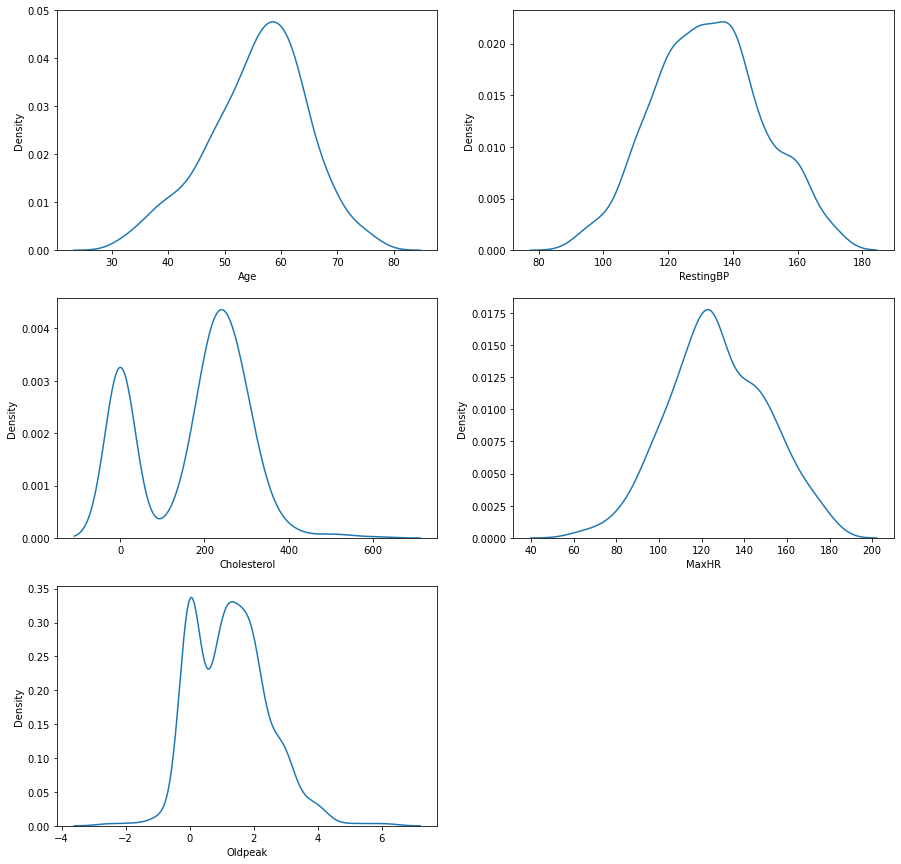

In [37]:
plt.figure(figsize=(15, 15))

for i , col in enumerate(continuos, 1):
    plt.subplot(3, 2, i)
    #df[df.HeartDisease == 0][col].hist(bins=30, label='No Heart Disease', alpha=0.8)
    #df[df.HeartDisease == 1][col].hist(bins=30)
    sns.kdeplot(data=df[df.HeartDisease==1]  , x=col)
    #plt.legend()
    plt.xlabel(col)

- People with age ranging from 47 to 62 are more likely to have heart disease.
- Resting blood pressure anything above 125-141 is generally of concern.
- People with a maximum of over 125 are more likely to have heart disease.

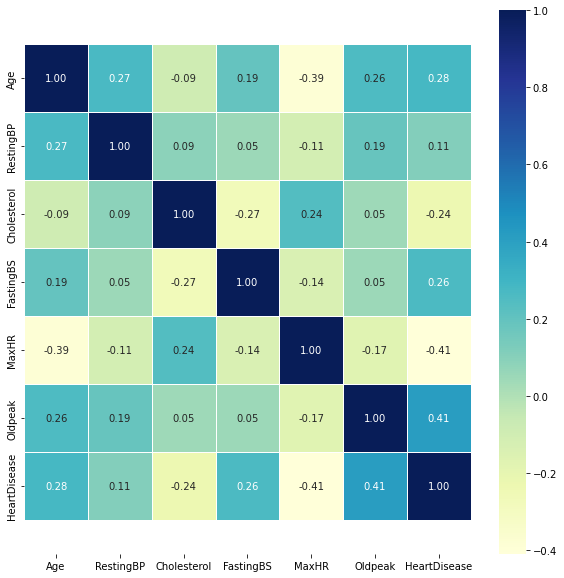

In [38]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- There are different types of correlation between the columns as positive and negative correlation, also there are no correlation between some columns.

Finding the outliers

<AxesSubplot:xlabel='RestingBP'>

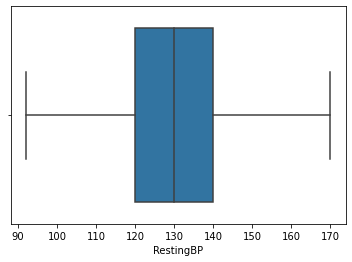

In [39]:
sns.boxplot(data=df, x='RestingBP')

In [224]:
q1 = np.percentile(df.RestingBP.sort_values(), 25)
q3 = np.percentile(df.RestingBP.sort_values(), 75)
print(q1, q3)
iqr = q3 - q1
l_out = q1 - (1.5*iqr)
h_out = q3 + (1.5*iqr)
print(l_out, h_out)
df = df[(df.RestingBP >= 90)  & (df.RestingBP <= 170) ] 
df.head()
df.shape

120.0 140.0
90.0 170.0


(890, 12)

In [41]:
# Dividing

In [222]:
category = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        category.append(cols)
    else:
        continuos.append(cols)

In [223]:
category

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [44]:
continuos

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [46]:
category

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [225]:
category.remove('HeartDisease')

In [226]:
dfs = pd.get_dummies(df, columns=category)

In [227]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [228]:
sc = StandardScaler()
dfs[continuos] = sc.fit_transform(dfs[continuos])

In [229]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.412644,0.561342,0.830420,1.383796,-0.828790,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,-0.464728,1.824700,-0.173569,0.752501,0.114100,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.728616,-0.070336,0.775155,-1.535945,-0.828790,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,-0.570052,0.435007,0.139602,-1.141386,0.585546,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,0.061893,1.193021,-0.035405,-0.589002,-0.828790,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [230]:
def performance_evaluation(y , y_pred, test=False):
    if test:
        print("Accuracy score of test data:", np.round(accuracy_score(y, y_pred)*100, 2))
        print("Recall score of test data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("F1 score of test data:      ", np.round(f1_score(y, y_pred)*100, 2))
    else:
        print("Accuracy score of validation data:", np.round(accuracy_score(y, y_pred)*100, 2 ))
        print("Recall score of validation data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("F1 score of validation data:      ", np.round(f1_score(y, y_pred)*100, 2))

In [231]:
X = dfs.drop('HeartDisease', axis = 1)
y = dfs.HeartDisease

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [233]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)

In [234]:
accuracy = []
recall = []
f1 = []
depth = np.arange(1,11)
for k in depth:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracy.append(accuracy_score(y_valid, y_pred))
    recall.append(recall_score(y_valid, y_pred))
    f1.append(f1_score(y_valid, y_pred))

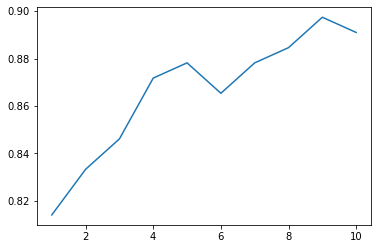

In [235]:
plt.plot(depth, np.array(accuracy));

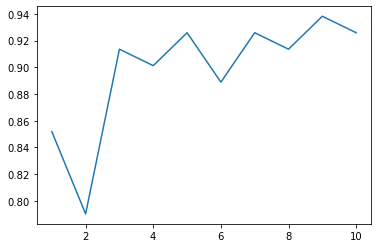

In [236]:
plt.plot(depth, np.array(recall));

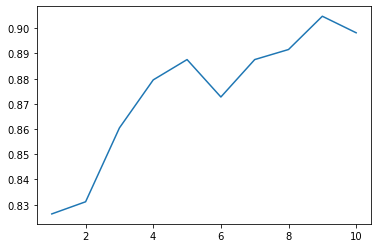

In [237]:
plt.plot(depth, np.array(f1));

In [238]:
# Validation for max recall
k = 7
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
performance_evaluation(y_valid, y_pred)

Accuracy score of validation data: 87.82
Recall score of validation data:   92.59
F1 score of validation data:       88.76


In [239]:
# Test
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, test=True)

Accuracy score of test data: 86.89
Recall score of test data:   92.41
F1 score of test data:       88.45


In [240]:
depth = np.arange(1,20)
accuracy = []
recall = []
f1 = []
for k in depth:
    reg_tree = DecisionTreeClassifier(max_depth=k, min_samples_leaf=5, criterion='gini')
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    accuracy.append(accuracy_score(y_valid, y_pred))
    recall.append(recall_score(y_valid, y_pred))
    f1.append(f1_score(y_valid, y_pred))

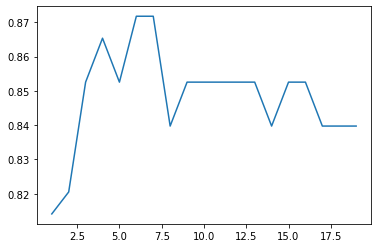

In [241]:
plt.plot(depth, np.array(accuracy));

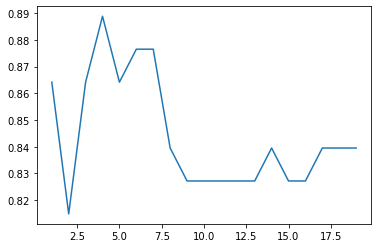

In [242]:
plt.plot(depth, np.array(recall));

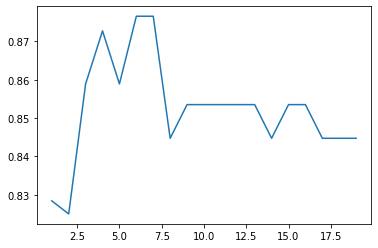

In [243]:
plt.plot(depth, np.array(f1));

Accuracy score of test data: 82.02
Recall score of test data:   82.07
F1 score of test data:       83.22


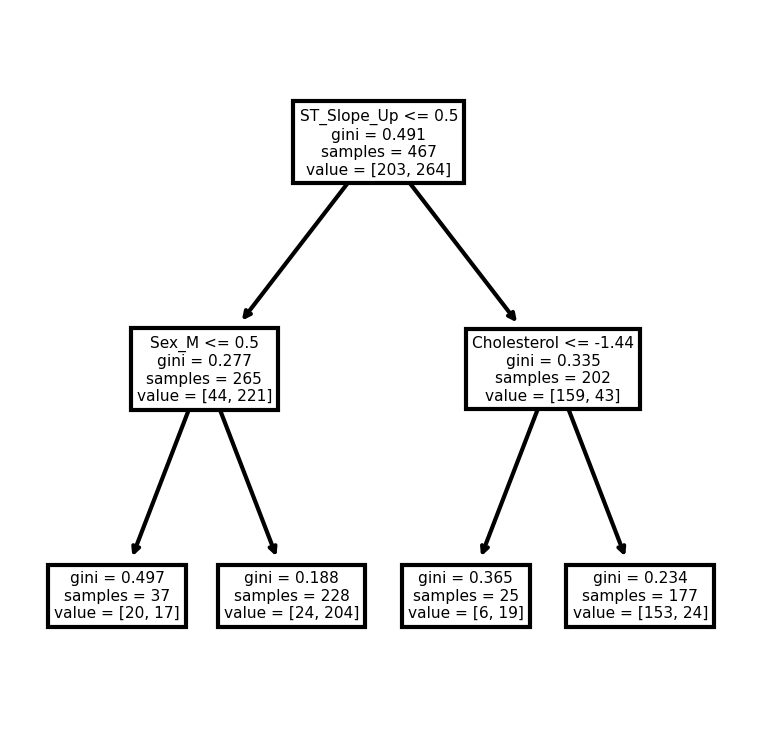

In [244]:
# Validation
reg_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
performance_evaluation(y_test, y_pred, test=True)

fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree, feature_names=list(X), filled=False);

Accuracy score of test data: 82.02
Recall score of test data:   82.07
F1 score of test data:       83.22


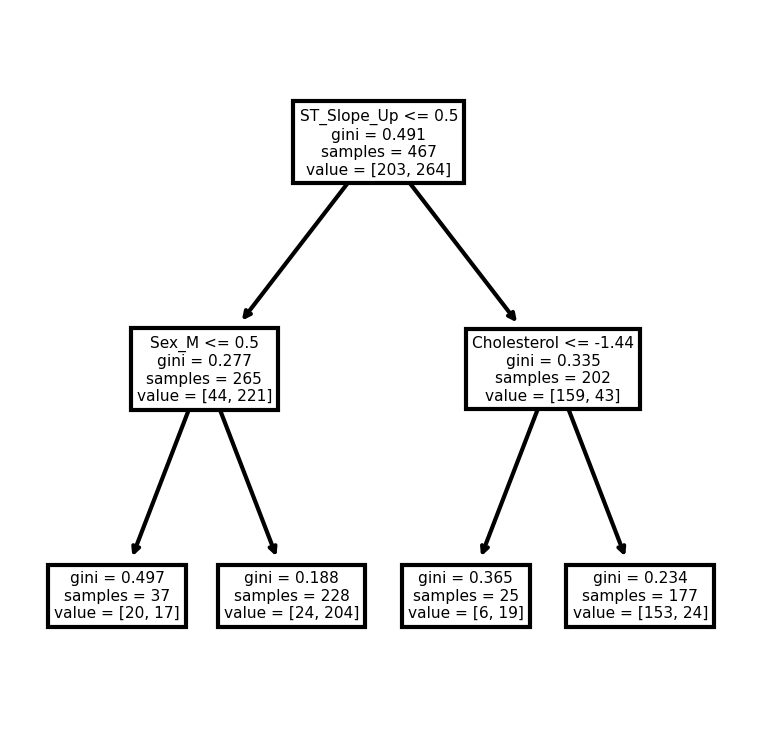

In [245]:
# Test
reg_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
performance_evaluation(y_test, y_pred, test=True)
from sklearn import tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree, feature_names=list(X), filled=False);

In [246]:
# Logistic

In [249]:
logi = LogisticRegression(solver='liblinear')
logi.fit(X_train, y_train)
y_pred = logi.predict(X_valid)
print(recall_score(y_valid, y_pred))
print(f1_score(y_valid, y_pred))

0.9135802469135802
0.8757396449704142


In [250]:
y_pred = logi.predict(X_test)
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9172413793103448
0.883720930232558
